In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

In [80]:
data = pd.read_csv('real_estate_price_size_year_view.csv')

In [81]:
data

,price,size,year,view
0,234314.144,643.09,2015,No sea view
1,228581.528,656.22,2009,No sea view
2,281626.336,487.29,2018,Sea view
3,401255.608,1504.75,2015,No sea view
4,458674.256,1275.46,2009,Sea view
...,...,...,...,...
95,252460.400,549.80,2009,Sea view
96,310522.592,1037.44,2009,No sea view
97,383635.568,1504.75,2006,No sea view
98,225145.248,648.29,2015,No sea view


In [82]:
data = data.copy()
data['view'] = data['view'].map({'Sea view': 1, 'No sea view': 0})

In [83]:
data

,price,size,year,view
0,234314.144,643.09,2015,0
1,228581.528,656.22,2009,0
2,281626.336,487.29,2018,1
3,401255.608,1504.75,2015,0
4,458674.256,1275.46,2009,1
...,...,...,...,...
95,252460.400,549.80,2009,1
96,310522.592,1037.44,2009,0
97,383635.568,1504.75,2006,0
98,225145.248,648.29,2015,0


In [84]:
y = data['price']
x1 = data['size']

In [85]:
x1.shape

(100,)

In [86]:
x1_new = x1.values.reshape(100, 1)

In [87]:
x1_new.shape

(100, 1)

In [88]:
y.shape

(100,)

In [89]:
reg = LinearRegression()

In [90]:
reg.fit(x1_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
reg.score(x1_new,y)

0.7447391865847586

coefficents

In [92]:
reg.coef_

array([223.17874259])

intercepts


In [93]:
reg.intercept_

101912.60180122912

In [97]:
new_data = pd.DataFrame(data=[400,600], columns = ['size'])
new_data

,size
0,400
1,600


In [98]:
reg.predict(new_data)

array([191184.09883907, 235819.84735799])

In [104]:
new_data['prices predicted'] = reg.predict(new_data)
new_data

,size,prices predicted
0,400,191184.098839
1,600,235819.847358


<function matplotlib.pyplot.show(*args, **kw)>

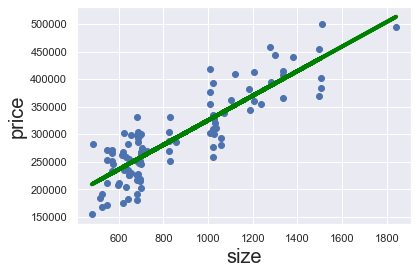

In [105]:
plt.scatter(x1,y)
yhat = 223.1787 * x1 + 101912.6
fig = plt.plot(x1, yhat, lw =4, c= 'green', label = 'regression line')
plt.xlabel('size', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.show